# https://github.com/microsoft/AcademicContent/tree/master/Labs/Deep%20Learning/200%20-%20Machine%20Learning%20in%20Python/2%20-%20Process

In [1]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  2231k      0 --:--:-- --:--:-- --:--:-- 2231k


In [2]:
import pandas as pd
df = pd.read_csv('flightdata.csv')
df.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK UNIQUE_CARRIER TAIL_NUM  \
0  2016        1      1             1            5             DL   N836DN   
1  2016        1      1             1            5             DL   N964DN   
2  2016        1      1             1            5             DL   N813DN   
3  2016        1      1             1            5             DL   N587NW   
4  2016        1      1             1            5             DL   N836DN   

   FL_NUM  ORIGIN_AIRPORT_ID ORIGIN     ...       CRS_ARR_TIME ARR_TIME  \
0    1399              10397    ATL     ...               2143   2102.0   
1    1476              11433    DTW     ...               1435   1439.0   
2    1597              10397    ATL     ...               1215   1142.0   
3    1768              14747    SEA     ...               1335   1345.0   
4    1823              14747    SEA     ...                607    615.0   

   ARR_DELAY  ARR_DEL15  CANCELLED  DIVERTED  CRS_ELAPSED_TIME  \
0      -41.0        0.0        0.0       0.0             338.0   
1        4.0        0.0        0.0       0.0             110.0   
2      -33.0        0.0        0.0       0.0             335.0   
3       10.0        0.0        0.0       0.0             196.0   
4        8.0        0.0        0.0       0.0             247.0   

   ACTUAL_ELAPSED_TIME  DISTANCE  Unnamed: 25  
0                295.0    2182.0          NaN  
1                115.0     528.0          NaN  
2                300.0    2182.0          NaN  
3                205.0    1399.0          NaN  
4                259.0    1927.0          NaN  

[5 rows x 26 columns]

In [3]:
df.shape

(11231, 26)

In [4]:
#check missing value in data
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [6]:
#eliminate column from Unnamed:25
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum() #The DataFrame with column 26 removed

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [7]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]] #filter column
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [8]:
#ARR_DEL15 column, which uses 0s to identify flights that arrived on time and 1s for flights that didn't
df[df.isnull().values.any(axis=1)].head() #show the first five rows with missing values

MONTH  DAY_OF_MONTH  DAY_OF_WEEK ORIGIN DEST  CRS_DEP_TIME  ARR_DEL15
177      1             9            6    MSP  SEA           701        NaN
179      1            10            7    MSP  DTW          1348        NaN
184      1            10            7    MSP  DTW           625        NaN
210      1            10            7    DTW  MSP          1200        NaN
478      1            22            5    SEA  JFK          2305        NaN

In [9]:
#Pandas represents missing values with NaN, which stands for Not a Number
#Replace missing value with 1
df = df.fillna({'ARR_DEL15': 1})

In [10]:
#show column 177 - 185 again
df.iloc[177:185]

MONTH  DAY_OF_MONTH  DAY_OF_WEEK ORIGIN DEST  CRS_DEP_TIME  ARR_DEL15
177      1             9            6    MSP  SEA           701        1.0
178      1             9            6    DTW  JFK          1527        0.0
179      1            10            7    MSP  DTW          1348        1.0
180      1            10            7    DTW  MSP          1540        0.0
181      1            10            7    JFK  ATL          1325        0.0
182      1            10            7    JFK  ATL           610        0.0
183      1            10            7    JFK  SEA          1615        0.0
184      1            10            7    MSP  DTW           625        1.0

In [11]:
#"bin" the departure times in the CRS_DEP_TIME column and use Pandas' get_dummies method to create indicator columns from the ORIGIN and DEST columns.#

In [12]:
import math
for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK ORIGIN DEST  CRS_DEP_TIME  ARR_DEL15
0      1             1            5    ATL  SEA            19        0.0
1      1             1            5    DTW  MSP            13        0.0
2      1             1            5    ATL  SEA             9        0.0
3      1             1            5    SEA  MSP             8        0.0
4      1             1            5    SEA  DTW            23        0.0

In [13]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST']) #Now use the following statements to generate indicator columns from the ORIGIN and DEST columns, while dropping the ORIGIN and DEST columns themselves:
df.head()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK  CRS_DEP_TIME  ARR_DEL15  ORIGIN_ATL  \
0      1             1            5            19        0.0           1   
1      1             1            5            13        0.0           0   
2      1             1            5             9        0.0           1   
3      1             1            5             8        0.0           0   
4      1             1            5            23        0.0           0   

   ORIGIN_DTW  ORIGIN_JFK  ORIGIN_MSP  ORIGIN_SEA  DEST_ATL  DEST_DTW  \
0           0           0           0           0         0         0   
1           1           0           0           0         0         0   
2           0           0           0           0         0         0   
3           0           0           0           1         0         0   
4           0           0           0           1         0         1   

   DEST_JFK  DEST_MSP  DEST_SEA  
0         0         0         1  
1         0         1         0  
2         0         0         1  
3         0         1         0  
4         0         0         0

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

#The first statement imports Sckit-learn's train_test_split helper function. 
#The second line uses the function to split the DataFrame into a training set containing 80% of the original data, 
#and a test set containing the remaining 20%. The random_state parameter seeds the random-number generator used to 
#do the splitting, while the first and second parameters are DataFrames containing the feature columns and the label column.

In [15]:
train_x.shape

(8984, 14)

In [16]:
!pip install autocomplete #install auto complete

     |████████████████████████████████| 2.4MB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 92kB 1.1MB/s  eta 0:00:01
  Created wheel for autocomplete: filename=autocomplete-0.0.104-cp36-none-any.whl size=2419769 sha256=f90d1d4d74d4062467e655f52c7cd38a767de688bf138110908523d318ef2d26
  Stored in directory: /home/nbuser/.cache/pip/wheels/4d/11/f3/ddb45c67013e9197c3a9f90b04ecfbbac238ec640162398ca1
Successfully built autocomplete
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
test_x.shape

(2247, 14)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

The output shows the parameters used in the classifier, including n_estimators, 
which specifies the number of trees in each decision-tree forest, and max_depth, which specifies the maximum depth 
of the decision trees. The values shown are the defaults, but you can override any of them when creating the 
RandomForestClassifier object.

In [20]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8602581219403649

#The mean accuracy is 86%, which seems good on the surface

""" 
There are several ways to measure the accuracy of a classification model. One of the best overall measures for a binary classification model is Area Under Receiver Operating Characteristic Curve (sometimes referred to as "ROC AUC"), 
which essentially quantifies how often the model will make a correct prediction regardless of the outcome. In this exercise, you will compute an ROC AUC score for the model you built in the previous exercise and learn about some of the reasons why that score is lower than the mean accuracy output by the score method. You will also learn about other ways to gauge the accuracy of the model.

Before you compute the ROC AUC, you must generate prediction probabilities for the test set. These probabilities are estimates for each of the classes, or answers, the model can predict. For example, [0.88199435, 0.11800565] means that there's an 89% chance that a flight will arrive on time (ARR_DEL15 = 0) and a 12% chance that it won't (ARR_DEL15 = 1). The sum of the two probabilities adds up to 100%.
"""

In [21]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [22]:
roc_auc_score(test_y, probabilities[:, 1])

0.6743824904998539

The output from the score method reflects how many of the items in the test set the model predicted correctly
This score is skewed by the fact that the dataset the model was trained and tested
with contains many more rows representing on-time arrivals than rows representing late arrivals. 
Because of this imbalance in the data, you are more likely to be correct if you predict that a flight 
will be on time than if you predict that a flight will be late.

You can learn more about the model's behavior by generating a confusion matrix, also known as an error matrix. The confusion matrix quantifies the number of times each answer was classified correctly or incorrectly. Specifically, it quantifies the number of false positives, false negatives, true positives, and true negatives. This is important, because if a binary classification model trained to recognize cats and dogs is tested with a dataset that is 95% dogs, it could score 95% simply by guessing "dog" every time. But if it failed to identify cats at all, it would be of little value.

Use the following code to produce a confusion matrix for your model:

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1882,   54],
       [ 260,   51]])

In [ ]:
# Sckit-learn contains a handy method named precision_score for computing precision. 
# To quantify the precision of your model, execute the following statements:

In [25]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9972375690607734

In [ ]:
# Sckit-learn also contains a method named recall_score for computing recall. 
# To measure you model's recall, execute the following statements:

In [26]:
from sklearn.metrics import recall_score
recall_score(train_y, train_predictions)

0.8650159744408946

In this exercise, you will import Matplotlib into the notebook you have been working with and configure the notebook to support inline Matplotlib output.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

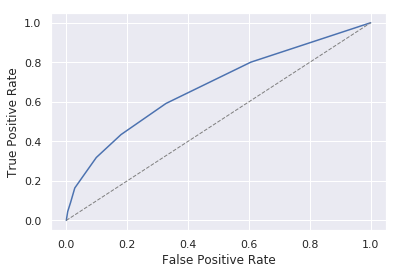

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Exercise 2: Predict on-time arrivals
The reason you built a machine-learning model is to predict whether a flight will arrive on time or late. In this exercise, you will write a Python function that calls the machine-learning model you built in the previous lab to compute the likelihood that a flight will be on time. Then you will use the function to analyze several flights.

Enter the following function definition in a new cell, and then run the cell.

In [29]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)
    
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    
    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [30]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.6

In [ ]:
#onfirm that the output shows that the likelihood of an on-time arrival is 60%

In [ ]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')